<a href="https://colab.research.google.com/github/IvanSalinas2000/Datos-Masivos/blob/main/Tarea2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#Check this site for the latest download link https://www.apache.org/dyn/closer.lua/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!wget -q https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!tar xf spark-3.2.1-bin-hadoop3.2.tgz
!pip install -q findspark
!pip install pyspark
!pip install py4j

import os
import sys

import findspark
findspark.init()
findspark.find()

import pyspark

from pyspark.sql import DataFrame, SparkSession
from typing import List
import pyspark.sql.types as T
import pyspark.sql.functions as F

spark= SparkSession.builder.appName("Tarea 1").getOrCreate()

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Ign:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,326 kB]
Hit:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,594 kB]
Hit:13 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:14 http://archive.ubuntu.com

In [10]:
# Especifica la ruta del archivo
file_path = '/content/PhiUSIIL_Phishing_URL_Dataset.csv'

# Leer el archivo CSV
df = spark.read.csv(file_path, header=True, inferSchema=True)

In [7]:
# Mostrar el esquema del DataFrame
df.printSchema()

root
 |-- URL: string (nullable = true)
 |-- URLLength: integer (nullable = true)
 |-- Domain: string (nullable = true)
 |-- DomainLength: integer (nullable = true)
 |-- IsDomainIP: integer (nullable = true)
 |-- TLD: string (nullable = true)
 |-- URLSimilarityIndex: double (nullable = true)
 |-- CharContinuationRate: double (nullable = true)
 |-- TLDLegitimateProb: double (nullable = true)
 |-- URLCharProb: double (nullable = true)
 |-- TLDLength: integer (nullable = true)
 |-- NoOfSubDomain: integer (nullable = true)
 |-- HasObfuscation: integer (nullable = true)
 |-- NoOfObfuscatedChar: integer (nullable = true)
 |-- ObfuscationRatio: double (nullable = true)
 |-- NoOfLettersInURL: integer (nullable = true)
 |-- LetterRatioInURL: double (nullable = true)
 |-- NoOfDegitsInURL: integer (nullable = true)
 |-- DegitRatioInURL: double (nullable = true)
 |-- NoOfEqualsInURL: integer (nullable = true)
 |-- NoOfQMarkInURL: integer (nullable = true)
 |-- NoOfAmpersandInURL: integer (nullable

A continuacion se tienen las representaciones de las columnas en nuestro dataset

1. URL: La URL completa.
2. URLLength: La longitud de la URL en número de caracteres.
3. Domain: El dominio de la URL.
4. DomainLength: La longitud del dominio en número de caracteres.
5. IsDomainIP: Indica si el dominio es una dirección IP (1 = sí, 0 = no).
6. TLD: El dominio de nivel superior (Top-Level Domain) de la URL (por ejemplo, .com, .org).
7. URLSimilarityIndex: Un índice que mide la similitud de la URL con URLs conocidas.
8. CharContinuationRate: La tasa de continuación de caracteres en la URL.
9. TLDLegitimateProb: La probabilidad de que el TLD sea legítimo.
10. URLCharProb: La probabilidad de caracteres específicos en la URL.
11. TLDLength: La longitud del TLD en número de caracteres.
12. NoOfSubDomain: El número de subdominios en la URL.
13. HasObfuscation: Indica si la URL tiene ofuscación (1 = sí, 0 = no).
14. NoOfObfuscatedChar: El número de caracteres ofuscados en la URL.
15. ObfuscationRatio: La proporción de caracteres ofuscados en la URL.
16. NoOfLettersInURL: El número de letras en la URL.
17. LetterRatioInURL: La proporción de letras en la URL.
18. NoOfDegitsInURL: El número de dígitos en la URL.
19. DegitRatioInURL: La proporción de dígitos en la URL.
20. NoOfEqualsInURL: El número de signos de igualdad (=) en la URL.
21. NoOfQMarkInURL: El número de signos de interrogación (?) en la URL.
22. NoOfAmpersandInURL: El número de signos de ampersand (&) en la URL.
23. NoOfOtherSpecialCharsInURL: El número de otros caracteres especiales en la URL.
24. SpacialCharRatioInURL: La proporción de caracteres especiales en la URL.
25. IsHTTPS: Indica si la URL usa HTTPS (1 = sí, 0 = no).
26. LineOfCode: Número de líneas de código en la página web correspondiente a la URL.
27. LargestLineLength: La longitud de la línea más larga de código.
28. HasTitle: Indica si la página web tiene un título (1 = sí, 0 = no).
29. Title: El título de la página web.
30. DomainTitleMatchScore: Puntaje que mide la coincidencia entre el dominio y el título de la página.
31. URLTitleMatchScore: Puntaje que mide la coincidencia entre la URL y el título de la página.
32. HasFavicon: Indica si la página web tiene un favicon (1 = sí, 0 = no).
33. Robots: Indica si hay un archivo robots.txt (1 = sí, 0 = no).
34. IsResponsive: Indica si la página web es responsiva (1 = sí, 0 = no).
35. NoOfURLRedirect: El número de redirecciones URL.
36. NoOfSelfRedirect: El número de redirecciones internas.
37. HasDescription: Indica si la página web tiene una meta descripción (1 = sí, 0 = no).
38. NoOfPopup: El número de ventanas emergentes.
39. NoOfiFrame: El número de elementos iFrame.
40. HasExternalFormSubmit: Indica si la página web tiene un formulario que envía datos externamente (1 = sí, 0 = no).
41. HasSocialNet: Indica si la página web tiene enlaces a redes sociales (1 = sí, 0 = no).
42. HasSubmitButton: Indica si la página web tiene un botón de envío (1 = sí, 0 = no).
43. HasHiddenFields: Indica si la página web tiene campos ocultos (1 = sí, 0 = no).
44. HasPasswordField: Indica si la página web tiene un campo de contraseña (1 = sí, 0 = no).
45. Bank: Indica si la URL está relacionada con banca (1 = sí, 0 = no).
46. Pay: Indica si la URL está relacionada con pagos (1 = sí, 0 = no).
47. Crypto: Indica si la URL está relacionada con criptomonedas (1 = sí, 0 = no).
48. HasCopyrightInfo: Indica si la página web tiene información de derechos de autor (1 = sí, 0 = no).
49. NoOfImage: El número de imágenes en la página web.
50. NoOfCSS: El número de hojas de estilo CSS en la página web.
51. NoOfJS: El número de archivos JavaScript en la página web.
52. NoOfSelfRef: El número de referencias internas.
53. NoOfEmptyRef: El número de referencias vacías.
54. NoOfExternalRef: El número de referencias externas.
55. label: La etiqueta de la URL (1 = phishing, 0 = legítima).




In [11]:
# Convertir DataFrame a RDD
rdd = df.rdd


In [12]:
# Contar el número de filas en el RDD
num_filas = rdd.count()
print(f"Número de filas: {num_filas}")


Número de filas: 235795


In [16]:
# Contar valores distintos en la columna 'label' (legítimo vs phishing)
df.groupBy('label').count().show()



+-----+------+
|label| count|
+-----+------+
|    1|134850|
|    0|100945|
+-----+------+



In [14]:
# Seleccionar las columnas numéricas
numerical_columns = [
    'URLLength', 'DomainLength', 'IsDomainIP', 'URLSimilarityIndex', 'CharContinuationRate',
    'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation',
    'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL',
    'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
    'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL',
    'IsHTTPS', 'LineOfCode', 'LargestLineLength', 'HasTitle', 'DomainTitleMatchScore',
    'URLTitleMatchScore', 'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
    'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit',
    'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay',
    'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
    'NoOfEmptyRef', 'NoOfExternalRef', 'label'
]

# Obtener estadísticas descriptivas de las columnas numéricas
df.select(numerical_columns).describe().show()



+-------+-----------------+------------------+--------------------+------------------+--------------------+-------------------+--------------------+------------------+------------------+--------------------+--------------------+--------------------+------------------+-------------------+------------------+-------------------+-------------------+--------------------+-------------------+--------------------------+---------------------+------------------+------------------+------------------+------------------+---------------------+------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+------------------+---------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+--------------------+-------------------+-----------------+-----------------+------------------+------------------+------------------+------------

In [15]:
# Imprimir la cantidad de columnas en numerical_columns
print(f"Cantidad de columnas en numerical_columns: {len(numerical_columns)}")


Cantidad de columnas en numerical_columns: 51


In [16]:
#Calcularemos la correlacion con la variable label (menciona si es url de phishing 1=si, 0=no) y las demas
for col in numerical_columns:
    correlation = df.stat.corr('label', col)
    print(f"Correlation between label and {col}: {correlation}")


Correlation between label and URLLength: -0.23344507450505805
Correlation between label and DomainLength: -0.2831518897970989
Correlation between label and IsDomainIP: -0.06020248983438812
Correlation between label and URLSimilarityIndex: 0.8603580349950286
Correlation between label and CharContinuationRate: 0.4677352998341069
Correlation between label and TLDLegitimateProb: 0.09738926357111595
Correlation between label and URLCharProb: 0.4697485899604033
Correlation between label and TLDLength: -0.07915862308106306
Correlation between label and NoOfSubDomain: -0.005955129316835737
Correlation between label and HasObfuscation: -0.05247274048202198
Correlation between label and NoOfObfuscatedChar: -0.015314565572224218
Correlation between label and ObfuscationRatio: -0.04191473986003096
Correlation between label and NoOfLettersInURL: -0.2580904986712095
Correlation between label and LetterRatioInURL: -0.3677943369422898
Correlation between label and NoOfDegitsInURL: -0.17798040993402814

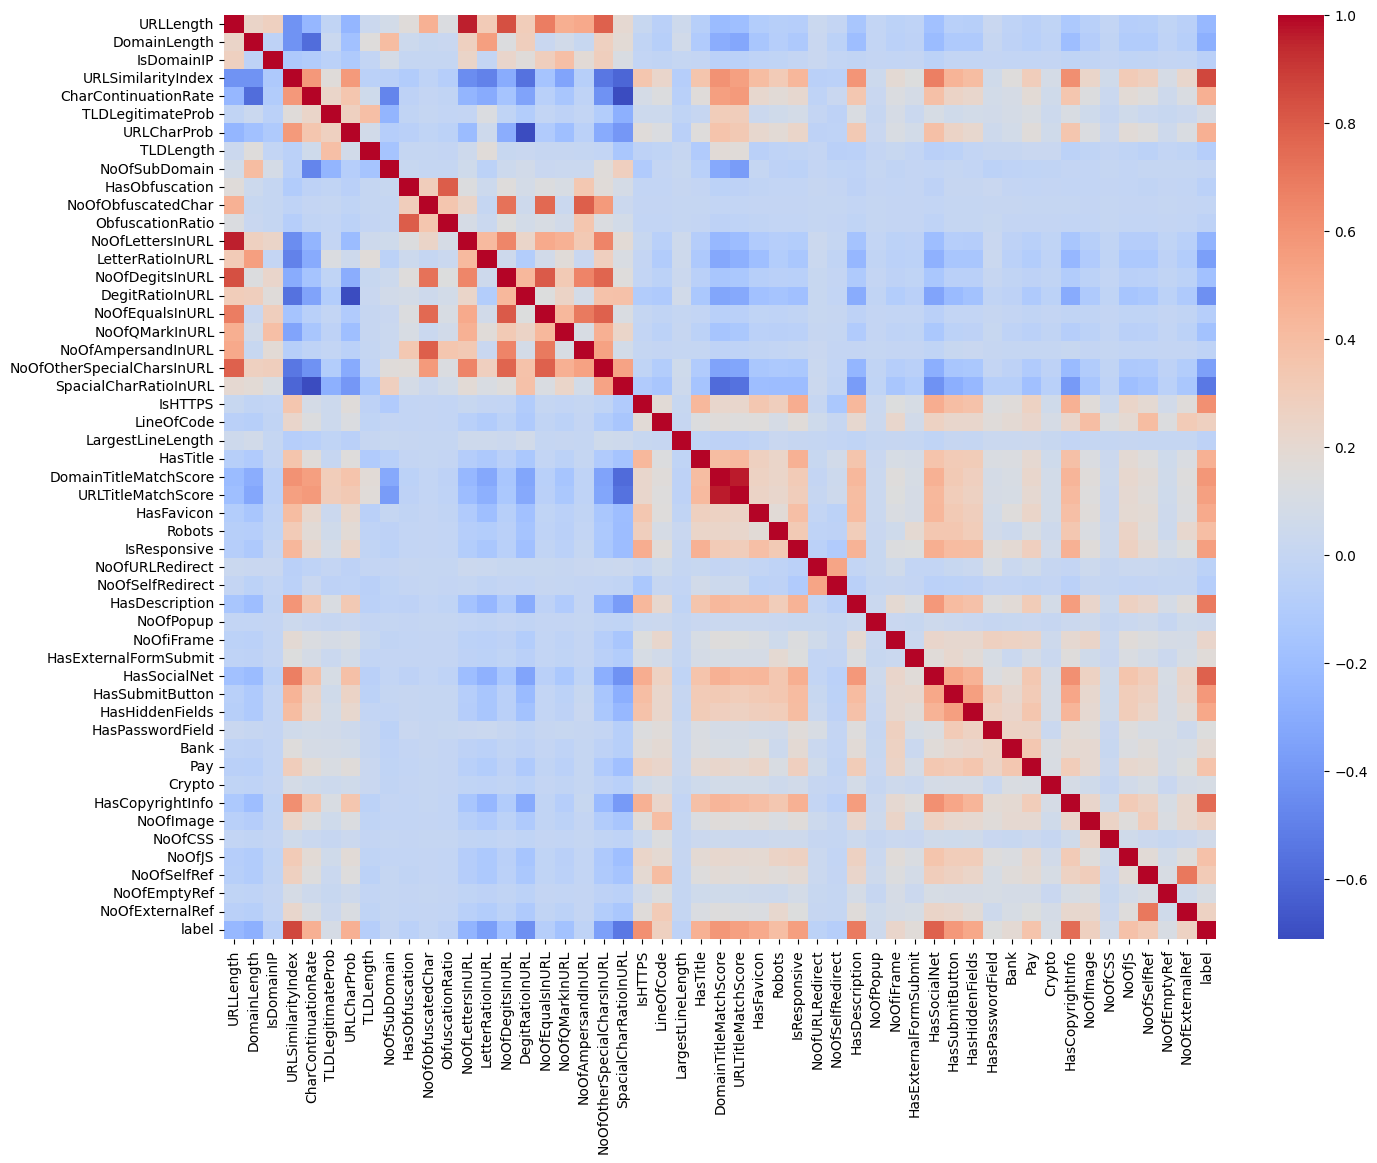

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una matriz de correlación
correlation_matrix = df.select(numerical_columns).toPandas().corr()

# Crear el mapa de calor usando seaborn
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap='coolwarm', cbar=True)

# Mostrar el gráfico
plt.show()




In [23]:
#NORMALIZAR DATOS
from pyspark.ml.feature import StandardScaler, PCA, VectorAssembler
from pyspark.ml.linalg import Vectors
# Primero ensamblamos las columnas numéricas en un solo vector
assembler = VectorAssembler(inputCols=numerical_columns, outputCol="features")
assembled_df = assembler.transform(df)

# Usar StandardScaler para normalizar los datos
scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withStd=True, withMean=False)
scaler_model = scaler.fit(assembled_df)
scaled_df = scaler_model.transform(assembled_df)


In [24]:
# Realizar PCA después de la normalización
# Definir el número de componentes principales deseado
pca = PCA(k=5, inputCol="scaled_features", outputCol="pca_features")
pca_model = pca.fit(scaled_df)

# Transformar los datos con PCA
pca_result_df = pca_model.transform(scaled_df)

# Mostrar los resultados de PCA
pca_result_df.select("pca_features").show(truncate=False)

+-------------------------------------------------------------------------------------------------+
|pca_features                                                                                     |
+-------------------------------------------------------------------------------------------------+
|[5.40108857300219,3.160371373186603,-0.6249351763498967,-5.4470614290815975,1.4807812647983944]  |
|[4.970935221539611,2.7289608245769816,-0.7378029604147087,-2.3509543866209732,2.1736163291712955]|
|[5.2112841748592285,3.064090602466208,-1.0513177215274123,-3.083152434297611,3.1652762520677857] |
|[6.432873828682518,3.5446451524108866,-1.0071752528554963,-5.283933123862951,0.7619983229197844] |
|[7.651374383136872,4.2181810153559685,-0.9253455744128981,-5.948664771022439,-1.3286924456206068]|
|[5.113525886707304,2.748468874599112,-0.152651412870144,-4.140986133747846,2.397993975826276]    |
|[5.285319571352866,2.6096033179267177,0.3750574836394545,-4.5738075158470375,0.28122662287589617]|


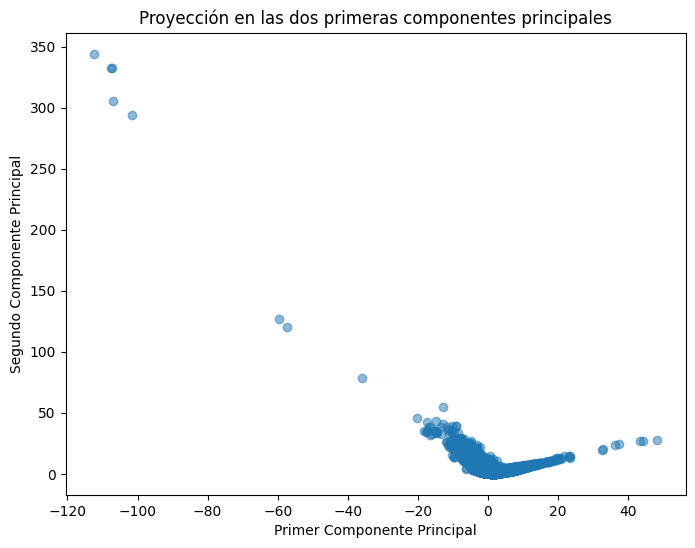

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Convertir los resultados de PCA a una lista de listas
pca_features = pca_result_df.select("pca_features").rdd.map(lambda row: row.pca_features).collect()

# Extraer las primeras dos componentes principales
pca_first_component = [x[0] for x in pca_features]
pca_second_component = [x[1] for x in pca_features]

# Crear un gráfico de dispersión de las dos primeras componentes principales
plt.figure(figsize=(8, 6))
plt.scatter(pca_first_component, pca_second_component, alpha=0.5)
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.title('Proyección en las dos primeras componentes principales')
plt.show()


In [26]:
# Obtener la varianza explicada por cada componente principal
explained_variance = pca_model.explainedVariance
print(f"Varianza explicada por cada componente: {explained_variance}")


Varianza explicada por cada componente: [0.1945955339416972,0.09923906074739344,0.053432403456927575,0.0404317453012927,0.03737201563932102]
